In [1]:
!python -V

Python 3.6.3


In [0]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.1-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

In [0]:
!pip3 install fastai

In [0]:
!mkdir data
!wget http://files.fast.ai/data/dogscats.zip
!unzip dogscats.zip -d data/

In [0]:
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

In [0]:
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [10]:
PATH = "data/dogscats/"
sz=224
os.listdir(PATH)

['train', 'test1', 'sample', 'valid', 'models']

In [12]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[0.      0.05286 0.02535 0.99121]
[1.      0.04927 0.02337 0.99219]



In [15]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [48]:
log_preds[:5]

array([[-0.00013, -8.91074],
       [-0.08239, -2.53723],
       [-0.00012, -9.04934],
       [-0.00023, -8.37138],
       [-0.00101, -6.89696]], dtype=float32)

In [0]:
# 0: cat, 1: dog
# log_preds得到了预测出的"概率"log后的结果, np.argmax(input_array, axis)会返回axis方向最大值的index.
# axis=1方向, 比如[-0.00013, -8.91074], -0.00013 > -8.91074, 结果是0, 表示为cat
# probs是对log_preds做exp还原之前的"概率". 上面的例子还原后为[0.99986, 0.00014]
preds = np.argmax(log_preds, axis=1)  
probs = np.exp(log_preds[:,1])       

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
# cat: 0, dog: 1
def rand_by_iscorrect_cat(is_correct): return rand_by_mask((preds == data.val_y)==is_correct & (preds==0))
def rand_by_iscorrect_dog(is_correct): return rand_by_mask((preds == data.val_y)==is_correct & (preds==1))

In [0]:
# 画图
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)
  
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))
catsdogs = ["Cat: ", "Dog: "]
def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [catsdogs[preds[x]] + str(probs[x]) for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


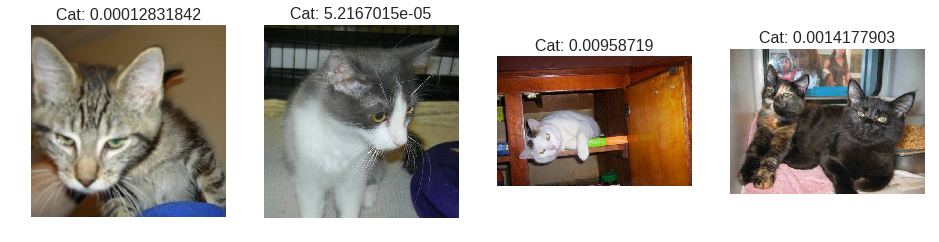

In [40]:
# 1. A few correct cat labels at random
plot_val_with_title(rand_by_iscorrect_cat(True), "Correctly classified")

Correctly classified


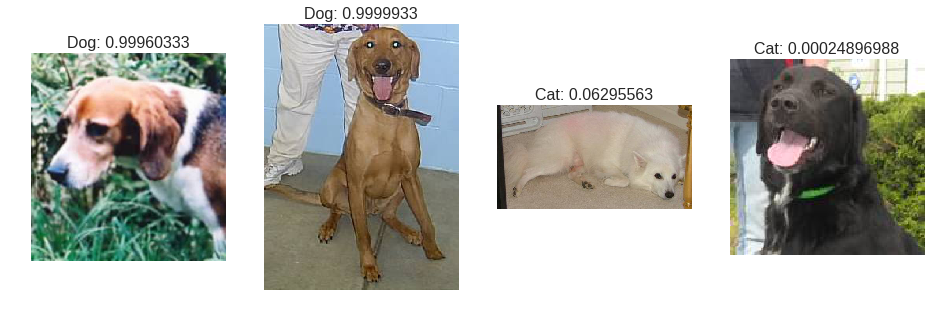

In [47]:
# 1. A few correct dog labels at random
plot_val_with_title(rand_by_iscorrect_dog(True), "Correctly classified")